<a href="https://colab.research.google.com/github/holms-ur/CellDetection/blob/main/Detection/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Enabling GPU within your notebook

# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [ ]:
%%capture
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
%%capture
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
%%capture
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
%%capture
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [ ]:
%%capture
!apt-get install tree

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def mostrarImagen(imagePath):
  image = cv2.imread(imagePath)
  if len(image.shape)==3:
    img2 = image[:,:,::-1]
    plt.imshow(img2)
    plt.show()
  else:
    img2 = image
    plt.imshow(img2,cmap='gray')
    plt.show()

def mostrarImagenConAnotacion(imagePath,annotationPath,classesPath):
    image = cv2.imread(imagePath)
    (H,W)=image.shape[:2]
    with open(annotationPath) as f:
        lines = f.readlines()
    with open(classesPath) as f:
        clases = f.readlines()
    for annot in lines:
        (c,x,y,w,h) = annot.split(' ')
        cv2.rectangle(image,(int((float(x)-float(w)/2)*W),int((float(y)-float(h)/2)*H)),(int((float(x)+float(w)/2)*W),int((float(y)+float(h)/2)*H)),(0,255,0),10)
        cv2.putText(image,clases[int(c)],(int((float(x)-float(w)/2)*W),int((float(y)-float(h)/2)*H-2)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
    img2 = image[:,:,::-1]
    plt.imshow(img2)
    plt.show()


# Step 3: Configuring Files for Training
This step downloading the dataset

## Dataset

In [1]:
%%capture
!wget https://github.com/holms-ur/CellDetection/releases/download/datasetYOLO/datasetYOLO.zip -O datasetYOLO.zip
!unzip datasetYOLO

In [ ]:
!tree datasetYOLO -L 1 -C

datasetYOLO
├── classes.data
├── classes.names
├── test
├── test.txt
├── train
├── train.cfg
└── train.txt

2 directories, 5 files


## cfg File

Copy the cfg file in another directory

In [ ]:
!cp datasetYOLO/train.cfg ./cfg

## Showing the files

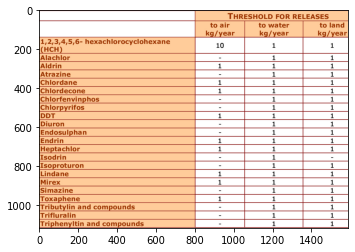

In [ ]:
mostrarImagen('datasetYOLO/train/eu-001-2-4.jpg')

In [ ]:
# !cat datasetYOLO/train/eu-001-2-4.txt

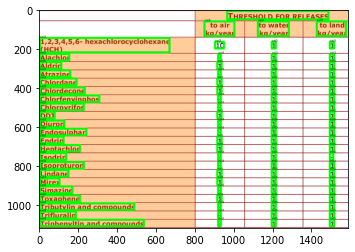

In [ ]:
mostrarImagenConAnotacion('datasetYOLO/train/eu-001-2-4.jpg','datasetYOLO/train/eu-001-2-4.txt','datasetYOLO/classes.names')

In [ ]:
!cat datasetYOLO/classes.names

cell

In [ ]:
!cat datasetYOLO/train.txt

In [ ]:
!cat datasetYOLO/train.cfg

In [ ]:
!cat datasetYOLO/classes.data

classes = 1
train  = datasetYOLO/train.txt
valid  = datasetYOLO/test.txt
names = datasetYOLO/classes.names
backup = backup

# Step 4: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv4 object detector on whatever crazy classes you have decided on. So run the following command. (-dont_show flag stops chart from popping up since Colab Notebook can't open images on the spot, -map flag overlays mean average precision on chart to see how accuracy of your model is, only add map flag if you have a validation dataset)
```
!./darknet detector train <path to obj.data> <path to custom config> yolov4.conv.137 -dont_show -map
```


In [ ]:
!./darknet detector train datasetYOLO/classes.data cfg/train.cfg yolov4.conv.137 -dont_show -map

# Step 5: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' train.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' train.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector test datasetYOLO/classes.data cfg/train.cfg datasetYOLO/train_last.weights datasetYOLO/test/eu-001-1-1.jpg -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

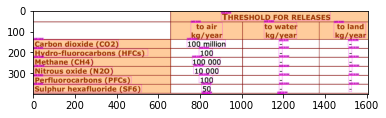

In [ ]:
mostrarImagen('predictions.jpg')

In [ ]:
!./darknet detector test datasetYOLO/classes.data cfg/train.cfg train_last.weights datasetYOLO/test/eu-001-1-1.jpg -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

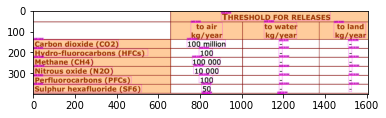

In [ ]:
mostrarImagen('predictions.jpg')

In [ ]:
!./darknet detector test datasetYOLO/classes.data cfg/train.cfg train_last.weights datasetYOLO/test/eu-001-1-2.jpg -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

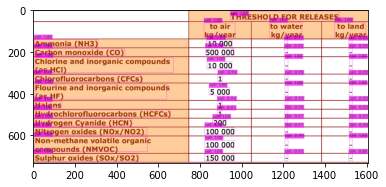

In [ ]:
mostrarImagen('predictions.jpg')

In [ ]:
!./darknet detector test datasetYOLO/classes.data cfg/train.cfg train_last.weights datasetYOLO/test/eu-004-11-10.jpg -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

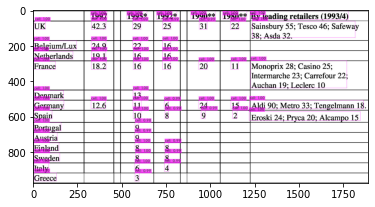

In [ ]:
mostrarImagen('predictions.jpg')

In [ ]:
!./darknet detector test datasetYOLO/classes.data cfg/train.cfg train_last.weights datasetYOLO/test/eu-003-1-1.jpg -thresh 0.4

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

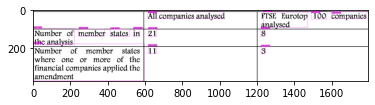

In [ ]:
mostrarImagen('predictions.jpg')

# Step 6: Metrics

Para obtener la COCO Metric:

In [ ]:
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.50 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.55 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.60 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.65 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.70 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.75 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.80 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.85 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.90 -points 101
!./darknet detector map datasetYOLO/classes.data cfg/train.cfg train_last.weights -iou_thresh 0.95 -points 101

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

In [ ]:
(0.008951+0.185030+0.497802+0.730764+0.833542+0.904194+0.940824+0.956031+0.958156+0.971144)/10

0.6986437999999999

Los resultados que obtenemos son los siguientes: (Con un umbral del IOU $\geq$ 0.5)
- mAP= 97.35%
- Precision= 0.97
- Recall= 0.98
- F1-score=0.97
- average IoU = 83.89 % 
- COCO metric: 69.85%